In [82]:
# importing Image class from PIL package
import glob
import scipy
import skimage
import matplotlib.pyplot as plt
from scipy import fft
from skimage import data, color
import numpy as np        
import skimage
import os
import cv2
from skimage import io
# from natsort import natsorted
from tqdm import tqdm
import numpy as np
from scipy import ndimage
from PIL import Image, ImageOps
import time
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb


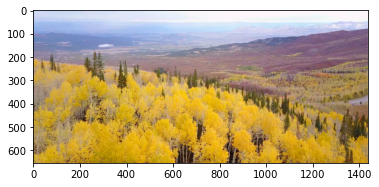

In [44]:
im = Image.open(r"/Users/mariemdiane/Desktop/fall.png")
plt.imshow(im)

In [53]:
import PIL.Image


rgba_image = PIL.Image.open(r"/Users/mariemdiane/Desktop/fall.png")
rgb_image = rgba_image.convert('RGB')
im = rgb_image

In [54]:
np.array(rgb_image).shape

(655, 1439, 3)

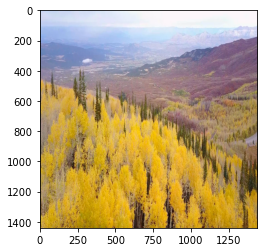

In [57]:
img = im.resize((1440,1440))
plt.imshow(img)

In [66]:
    rgb_img = np.array(img)
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]

In [67]:
value_img

array([[0.94117647, 0.94117647, 0.94117647, ..., 0.98823529, 0.98823529,
        0.99215686],
       [0.94117647, 0.94117647, 0.94117647, ..., 0.98823529, 0.98823529,
        0.99215686],
       [0.9372549 , 0.9372549 , 0.9372549 , ..., 0.98823529, 0.98823529,
        0.99607843],
       ...,
       [0.82352941, 0.77254902, 0.80392157, ..., 0.74509804, 0.74117647,
        0.49803922],
       [0.80784314, 0.76470588, 0.76862745, ..., 0.68235294, 0.71372549,
        0.38039216],
       [0.8       , 0.76470588, 0.75294118, ..., 0.65490196, 0.70196078,
        0.32941176]])

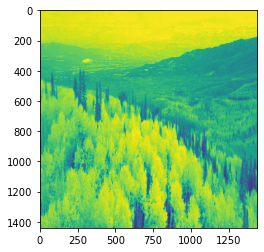

In [68]:
plt.imshow(value_img)

In [73]:
# On fait la texture fft sur value_image? # Dois faire l'op√©ration sur la phase de value_img

F2D = fft.rfft2(value_img, s=None, norm=None)
phase = 2 * np.pi * np.random.rand(F2D.shape[0], F2D.shape[1])

F_random = np.exp(1j * phase)
Fz_scrambled = F_random * F2D

In [79]:
np.array(Fz_scrambled).shape

(1440, 721)

In [80]:
value_img_scrambled = fft.irfft2(Fz_scrambled)
hsv_img[:, :, 2] = value_img_scrambled

In [83]:
test_image = hsv2rgb(hsv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


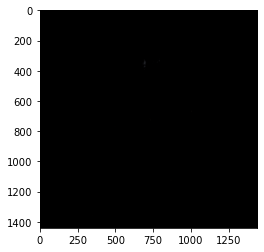

In [84]:
plt.imshow(test_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


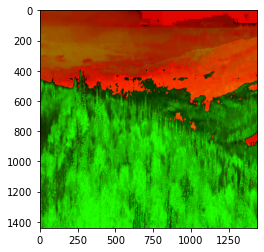

In [86]:
plt.imshow(hsv_img)